In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
stock_data = pd.read_csv("/home/hemangjoshi37a_gmail_com/HistoricalQuotes.csv")

stock_data['date']=stock_data['Date']
stock_data=stock_data.drop(['Date'], axis = 1) 

stock_data['close']=stock_data[' Close/Last']
stock_data=stock_data.drop([' Close/Last'], axis = 1) 
stock_data['close'] = stock_data['close'].str.replace('$', '')
stock_data['close'] = stock_data['close'].astype(float)

stock_data['volume']=stock_data[' Volume']
stock_data=stock_data.drop([' Volume'], axis = 1) 

stock_data['open']=stock_data[' Open']
stock_data=stock_data.drop([' Open'], axis = 1) 
stock_data['open'] = stock_data['open'].str.replace('$', '')
stock_data['open'] = stock_data['open'].astype(float)

stock_data['high']=stock_data[' High']
stock_data=stock_data.drop([' High'], axis = 1) 
stock_data['high'] = stock_data['high'].str.replace('$', '')
stock_data['high'] = stock_data['high'].astype(float)

stock_data['low']=stock_data[' Low']
stock_data=stock_data.drop([' Low'], axis = 1) 
stock_data['low'] = stock_data['low'].str.replace('$', '')
stock_data['low'] = stock_data['low'].astype(float)

stock_data["average"] = (stock_data["high"] + stock_data["low"])/2

stock_data

Using TensorFlow backend.


,date,close,volume,open,high,low,average
0,05/15/2020,1373.19,1707747,1350.00,1374.4800,1339.000,1356.7400
1,05/14/2020,1356.13,1603077,1335.02,1357.4200,1323.910,1340.6650
2,05/13/2020,1349.33,1812585,1377.05,1385.4822,1328.400,1356.9411
3,05/12/2020,1375.74,1390600,1407.12,1415.0000,1374.770,1394.8850
4,05/11/2020,1403.26,1412116,1378.28,1416.5300,1377.152,1396.8410
...,...,...,...,...,...,...,...
1541,04/02/2014,567.00,146697,599.99,604.8300,562.190,583.5100
1542,04/01/2014,567.16,7932,558.71,568.4500,558.710,563.5800
1543,03/31/2014,556.97,10772,566.89,567.0000,556.930,561.9650
1544,03/28/2014,559.99,41003,561.20,566.4300,558.670,562.5500


In [5]:
input_feature= stock_data.iloc[:,[2,3,4,5,6]].values
input_data = input_feature
input_data

array([[1.7077470e+06, 1.3500000e+03, 1.3744800e+03, 1.3390000e+03,
        1.3567400e+03],
       [1.6030770e+06, 1.3350200e+03, 1.3574200e+03, 1.3239100e+03,
        1.3406650e+03],
       [1.8125850e+06, 1.3770500e+03, 1.3854822e+03, 1.3284000e+03,
        1.3569411e+03],
       ...,
       [1.0772000e+04, 5.6689000e+02, 5.6700000e+02, 5.5693000e+02,
        5.6196500e+02],
       [4.1003000e+04, 5.6120000e+02, 5.6643000e+02, 5.5867000e+02,
        5.6255000e+02],
       [1.3052000e+04, 5.6800000e+02, 5.6800000e+02, 5.5292000e+02,
        5.6046000e+02]])

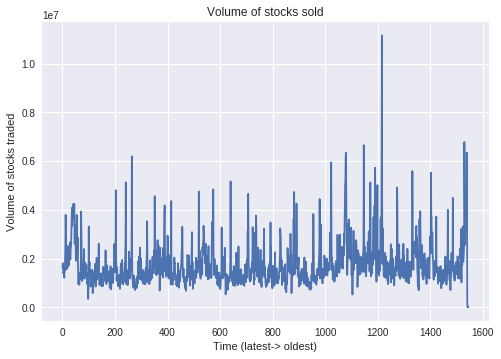

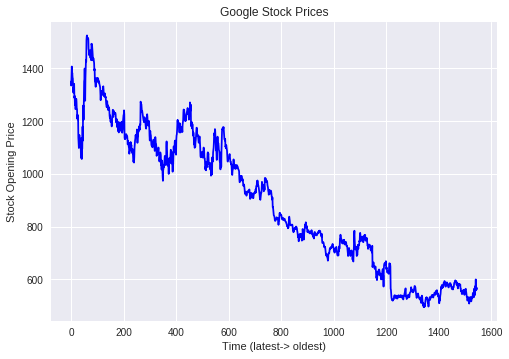

In [6]:
plt.style.use("seaborn")
plt.plot(input_feature[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

plt.plot(input_feature[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [7]:
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:5] = sc.fit_transform(input_feature[:,:])

In [8]:
lookback= 50

test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [9]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(1495,50, 5)
X_test = X_test.reshape(513,50, 5)
print(X.shape)
print(X_test.shape)

(1495, 50, 5)
(513, 50, 5)


In [10]:
X.shape,y.shape

((1495, 50, 5), (1495,))

In [22]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(50,5)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 50, 30)            4320      
_________________________________________________________________
lstm_11 (LSTM)               (None, 50, 30)            7320      
_________________________________________________________________
lstm_12 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 18,991
Trainable params: 18,991
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.save('/home/hemangjoshi37a_gmail_com/stkwise_models60/TATASTEEL/TATASTEEL_4.h5')

In [25]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
1495/1495 [==============================] - 10s 7ms/step - loss: 0.0289
Epoch 2/20
1495/1495 [==============================] - 6s 4ms/step - loss: 0.0019
Epoch 3/20
1495/1495 [==============================] - 6s 4ms/step - loss: 0.0017
Epoch 4/20
1495/1495 [==============================] - 6s 4ms/step - loss: 0.0014
Epoch 5/20
1495/1495 [==============================] - 6s 4ms/step - loss: 0.0012
Epoch 6/20
1495/1495 [==============================] - 6s 4ms/step - loss: 0.0012
Epoch 7/20
1495/1495 [==============================] - 5s 3ms/step - loss: 0.0011
Epoch 8/20
1495/1495 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 9/20
1495/1495 [==============================] - 5s 3ms/step - loss: 0.0010
Epoch 10/20
1495/1495 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 11/20
1495/1495 [==============================] - 5s 3ms/step - loss: 9.7880e-04
Epoch 12/20
1495/1495 [==============================] - 5s 3ms/step - loss: 8.9

In [26]:
predicted_value= model.predict(X_test)

In [27]:
X_test.shape

(513, 50, 5)

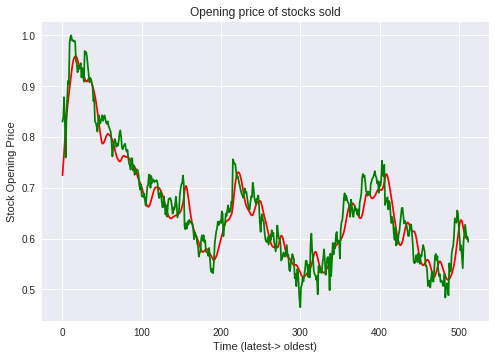

In [28]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [29]:
import neptune

# The init() function called this way assumes that 
# NEPTUNE_API_TOKEN environment variable is defined.

neptune.init('hemangjoshi37a/sandbox')
neptune.create_experiment(name='minimal_example')

# log some metrics

for i in range(100):
    neptune.log_metric('loss', 0.95**i)

neptune.log_metric('AUC', 0.96)

MissingApiToken: Missing API token. Use "NEPTUNE_API_TOKEN" environment variable or pass it as an argument